# Artem Grigorian, gr 203, НА03, data 01, Python

## №1
A researcher investigating regional variations in wages uses data on 1,000 individuals in a U.S.
survey to fit the following regressions (standard errors in parentheses; RSS is residual sum of squares):

\begin{equation}
\hat{EARN} = \underset{(2.00)}{-5.49} + \underset{(0.15)}{1.40S} \qquad RSS = 65.50
\newline
\hat{EARN} = \underset{(2.03)}{-5.43} + \underset{(0.15)}{1.34S} - \underset{(0.83)}{0.26NC} + \underset{(0.97)}{3.28NE} + \underset{(1.00)}{1.29W} \qquad RSS = 64.14
\end{equation}

where EARN is hourly earnings in U.S. $, S is the number of years of schooling of the individual, and NC (north central), NE (north east) and W (west) are regional dummy variables for the residence of the individual (south is
the reference category).

#### 1.1 
##### Explain how the dummy variables are defined here
Dummy variables here represent some regions. So, whenever one of NC, NE or W is set to 1, representing the person from specific region, others are set to zero. For example, if a person is from north central region his equation would look like this:
\begin{equation}
NC=1, NE=0, W=0
\newline
\hat{EARN} = -5.69 + 1.34S
\end{equation}

##### Explain the meaning and the role of the coefficients.
If some person lives in North Central then his hourly earnings decrease by 0,26 \$ \
If some person lives in North East then his hourly earnings increase by 3,28 \\$ \
If some person lives in West then his hourly earnings increase by 1,29 \\$ \
With each year of schooling increases hourly earnings increse by 1.34 \\$ \
A person with absolutely no education, and with no region affiliation would get -5.43 \\$ as his earnings (only have expenditures)

##### Represent the second equation graphically.


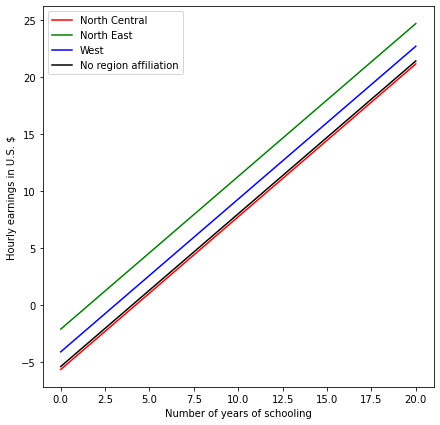

In [31]:
import numpy as np
import matplotlib.pyplot as plt

earn = lambda s, nc, ne, w: -5.43 + 1.34*s - 0.26*nc + 3.28*ne + 1.29*w

s = np.linspace(0, 20, 100)
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(s, earn(s, 1, 0, 0), 'r', label="North Central")
ax.plot(s, earn(s, 0, 1, 0), 'g', label="North East")
ax.plot(s, earn(s, 0, 0, 1), 'b', label="West")
ax.plot(s, earn(s, 0, 0, 0), 'black', label="No region affiliation")
ax.set_xlabel("Number of years of schooling")
ax.set_ylabel("Hourly earnings in U.S. $")
ax.legend()
plt.show()

#### 1.2. 
##### Do the significance tests for the coefficients of the dummy variables
First of all, let's do significance test for NC 
\begin{equation}
H_0: NC = 0 \qquad \text{(insignificant)}
\newline
H_1: NC \neq 0 \qquad \text{(significant)}
\newline
\newline
T = \frac{\hat{NC}-0}{SE(NC)} = \frac{-0.26}{0.83} = -0.313
\newline
\alpha = 0.05, \quad t_{0.025} (998) = -1.962 , \quad t_{0.975} (998) = 1.962 \quad \Rightarrow \quad T \in A.R \quad \Rightarrow \quad \text{We fail to reject } H_0 \quad \Rightarrow \quad \text{NC is insignificant}
\end{equation}
\
\
Now, let's do significance test for NE:
\begin{equation}
H_0: NE = 0 \qquad \text{(insignificant)}
\newline
H_1: NE \neq 0 \qquad \text{(significant)}
\newline
\newline
T = \frac{\hat{NE}-0}{SE(NE)} = \frac{3.28}{0.97} = 3.38
\newline
\alpha = 0.05, \quad t_{0.025} (998) = -1.962 , \quad t_{0.975} (998) = 1.962 \quad \Rightarrow \quad T \notin A.R \quad \Rightarrow \quad \text{We reject } H_0 \quad \Rightarrow \quad \text{NE is significant}
\end{equation}
\
\
Now, let's do significance test for W:
\begin{equation}
H_0: W = 0 \qquad \text{(insignificant)}
\newline
H_1: W \neq 0 \qquad \text{(significant)}
\newline
\newline
T = \frac{\hat{W}-0}{SE(W)} = \frac{1.29}{1} = 1.29
\newline
\alpha = 0.05, \quad t_{0.025} (998) = -1.962 , \quad t_{0.975} (998) = 1.962 \quad \Rightarrow \quad T \in A.R \quad \Rightarrow \quad \text{We fail to reject } H_0 \quad \Rightarrow \quad \text{W is insignificant}
\end{equation}

##### Do a test of the explanatory power of the dummy variables as a group
\begin{equation}
H_0: NC=NE=W= 0
\newline
H_1: NC \neq 0 \text{ or } NE \neq 0 \text{ or } W \neq 0
\newline
\newline
F = \frac{^{RSS_1-RSS_2}/_m}{^{RSS_2}/_{n-k}} = \frac{^{65,50-64,14}/_3}{^{64,14}/_{1000-5}} = 7,032
\newline
F_{crit} = F_{0,95}(3; 995)=2,61385
\newline
F \in C.R. \quad \Rightarrow \quad \text{We reject } H_0 \quad \Rightarrow \quad \text{Dummy variables have significant explanatory power}
\end{equation}

#### 1.3
##### Suppose the researcher had taken the western region as the reference category. What differences would this have made to the second regression?
If W is a reference category then we add South regiom(SR) to the equation having the same result but with different coefficients. \
So, the equation would look like:
\begin{equation}
\hat{EARN} = \overset{+1.29}{-5.43} + 1.34S - \overset{-1.29}{0.26NC} + \overset{-1.29}{3.28NE} + 1.29W = - 4,14 + 1,34S - 1,55NC + 1,99NE-1,29SR
\end{equation}
So, The difference in coefficients which leads to no changes in overall model.

##### Suppose that the researcher wished to investigate whether the impact of schooling on earnings was different in the four regions. How could this be done?
If the researcher wants to investigate whether the impact of schooling on earnings was different in the four regions he should run the Chow test.
\begin{equation}
H_0: NC = NE = W = D
\newline
H_1: otherwise
\newline
F = \frac{^{(RSS_{2} - (RSS_{NC} + RSS_{NE} + RSS_{W}))}/_{(k*(m-1))}}{^{(RSS_{NC} + RSS_{NE} + RSS_{W})}/_{(n-mk)}}
\end{equation}

## №2
A researcher has observations on EARN, earnings measured in $ per hour, S, years of schooling, and ASVABC, the score on a test
of cognitive ability \
(here in \%), for 2,868 individuals in the United States in 1994. She also defines dummy variables MALE and UNION. MALE is equal to one if the individual is male and 0 if she is female. UNION is equal to 1 if the individual belonged to a union in 1994, 0 otherwise. She runs the following regressions, whose results are summarized in the table below:
(1) a regression of the logarithm of earnings on S, ASVABC, and MALE, using the entire sample
(2) the same specification, for those individuals who belonged to a union
(3) the same specification, for those individuals who did not belong to a union
(4) the same specification with the dummy variable UNION added, for the entire sample.
The table gives the regression coefficients. Standard errors are given in parentheses, RSS is the residual sum of
squares, and n is the number of observations in the regression. Dependent Var.: Logarithm of Hourly Earnings

| | 1: whole sample (2868) | 2: union only (286) | 3: non-union only (2582) | 4: whole sample (2868) |
| ------------- | ------------- | ------------- | ------------- | ------------- |
| S | 0.066 (0.004) | 0.028 (0.012) | 0.070 (0.005) | 0.066 (0.004) |
| ASVABC | 0.013 (0.001) | 0.011 (0.003) | 0.013 (0.001) | 0.013 (0.001) |
| MALE | 0.214 (0.017) | 0.286 (0.049) | 0.199 (0.018) | 0.209 (0.017) |
| UNION | - | - | - | 0.189 (0.028) |
| Constant | 0.819 (0.055) | 1.545 (0.164) | 0.750 (0.058) | 0.803 (0.055) |
| R^2 / RSS | 0.249 / 588.3 | 0.195 / 43.7 | 0.260 / 522.5 | 0.261 / 579.7 |

#### 2.1. 
##### Give an economic interpretation of the first equation.
For the first equation, coefficient:\
S means that for each additional year of schooling, hourly earnings increase by 6.6%.\
ASVABC means that for each additional point, hourly earnings decrease by 1.3%.\
MALE means that if the person is a male, their hourly earnings increase by 21.4% relative to women's earnings.

#### 2.2
##### Determine whether the earnings functions are different for union members and non-members
(i)using a Chow test \
\begin{equation}
H_0: \beta_{UNION} = \beta_{NON-UNION} = D
\newline
H_1: otherwise
\newline
F = \frac{^{(RSS_{1} - (RSS_{2} + RSS_{3}))}/_{(k*(m-1))}}{^{(RSS_{2} + RSS_{3})}/_{(n-mk)}} = 37.237
\newline
F_{crit} = 2.61 \text{at significance level 0.05}
\newline
F \quad > \quad F_{crit} \quad \Rightarrow \quad \text{We reject } H_0 \quad \Rightarrow \quad \text{Earning function is different for union members and non-members}
\end{equation}
\
(ii)using a t-test on the coefficient of the union dummy variable \
\begin{equation}
H_0: \beta_{UNION} = 0 
\newline
H_1: \beta_{UNION} \neq 0
\newline
T = \frac{\beta_{UNION} - 0}{\sigma_{UNION}} = \frac{0.189 - 0}{0.028} = 6.75
\newline
T_{crit} = 1.96 \text{ at significance level 0.05}
\newline
T \quad > \quad T_{crit} \quad \Rightarrow \quad \text{We reject } H_0 \quad \Rightarrow \quad \text{Earning function is different for union members and non-members}
\end{equation}

##### Explain the relationship between these two approaches to testing for differences in the earnings functions for union and non-union workers. Is it possible that they might lead to different conclusions?
t-test checks one coefficient significance.\
Chow test checks model fitness on subsamples.\
These tests might lead to different conclusions when model goes through significant changes in dummy variables.

## №3
For your data set ha03_data01 explore whether earnings of respondents are different for different categories defined by several dummy variables - MALE, FEMALE, MARRIED.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

df = pd.read_excel('ha03_data01.xls')
df.head()

,age,asvabc,earnings,ethblack,ethhisp,ethwhite,female,male,married,s,urban
0,37,30.36646,9.00,0,0,1,0,1,1,12,0
1,42,45.08792,10.00,0,0,1,0,1,0,12,1
2,42,50.54031,20.50,0,0,1,0,1,1,12,1
3,41,38.27243,9.97,0,0,1,0,1,1,12,1
4,41,54.35698,12.30,0,0,1,0,1,1,12,1


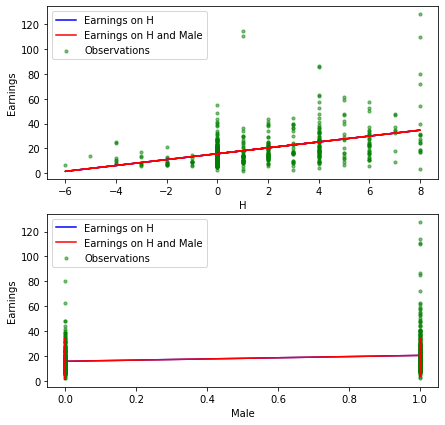

In [62]:
df['H'] = df['s']-12

m = LinearRegression(n_jobs=-1)
m.fit(np.array(df.H).reshape(-1, 1), df.earnings)
lineregrH = m.predict(np.array(df.H).reshape(-1, 1))

m1 = LinearRegression(n_jobs=-1)
m1.fit(np.array(df.H, df.male).reshape(-1, 1), df.earnings)
lineregrHML = m1.predict(np.array(df.H, df.male).reshape(-1, 1))

fig, axs = plt.subplots(2, figsize=(7, 7))
axs[0].scatter(df.H, df.earnings, facecolor="g", s=10, alpha=0.5, label ="Observations")
axs[0].plot(df.H, lineregrH, 'b', label="Earnings on H")
axs[0].plot(df.H, lineregrHML, 'r', label="Earnings on H and Male")
axs[0].set_xlabel("H")
axs[0].set_ylabel("Earnings")
axs[0].legend()
axs[1].scatter(df.male, df.earnings, facecolor="g", s=10, alpha=0.5, label ="Observations")
axs[1].plot(df.male, lineregrH, 'b', label="Earnings on H")
axs[1].plot(df.male, lineregrHML, 'r', label="Earnings on H and Male")
axs[1].set_xlabel("Male")
axs[1].set_ylabel("Earnings")
axs[1].legend()
plt.show()